In [120]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Added By Moi
import numpy as np
import plotly.express as px

In [121]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [122]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [123]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

In [124]:
# Lets discover and get the columns name 
df_market_data.columns

Index(['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y'],
      dtype='object')

---

### Prepare the Data

In [125]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
df_market_data_scaled = StandardScaler().fit_transform(df_market_data[['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y']])

In [126]:
# Create a DataFrame with the scaled data
df_market_scaled=pd.DataFrame(df_market_data_scaled, 
                             columns=['price_change_percentage_24h', 'price_change_percentage_7d',
                                       'price_change_percentage_14d', 'price_change_percentage_30d',
                                       'price_change_percentage_60d', 'price_change_percentage_200d',
                                       'price_change_percentage_1y'])

# Copy the crypto names from the original data

df_market_scaled['Crypto_names']=df_market_data.index

# Set the coinid column as index
df_market_scaled=df_market_scaled.set_index('Crypto_names')

# Display sample data
df_market_scaled.head(8)


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
Crypto_names,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428


---

### Find the Best Value for k Using the Original Scaled DataFrame.

In [127]:
# Create a list with the number of k-values from 1 to 11
k=list(range(1,11))

In [128]:
# Create an empty list to store the inertia values
inertia=[]


# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list

for i in k:
    k_model = KMeans(n_clusters=i, random_state=0)
    k_model.fit(df_market_scaled)
    inertia.append(k_model.inertia_)



In [129]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k_original": k, "inertia": inertia}


# Create a DataFrame with the data to plot the Elbow curve
df_elbow_original = pd.DataFrame(elbow_data)

# Review the DataFrame
df_elbow_original.head()

,k_original,inertia
0,1,287.000000
1,2,198.571818
2,3,145.635748
3,4,79.022435
4,5,66.217780


In [130]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
elbow_plot = df_elbow_original.hvplot.line(
    x="k_original", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)

elbow_plot

:Curve   [k_original]   (inertia)

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:   4     ** 

---

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [131]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=0)

In [132]:
# Fit the K-Means model using the scaled DataFrame
model.fit(df_market_scaled)

KMeans(n_clusters=4, random_state=0)

In [133]:
# Predict the clusters to group the cryptocurrencies using the scaled DataFrame
kmeans_predictions = model.predict(df_market_scaled)

# Print the resulting array of cluster values.
kmeans_predictions

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 3, 0, 0, 0, 0],
      dtype=int32)

In [134]:
# Create a copy of the scaled DataFrame
df_market_scaled_prediction=df_market_scaled.copy()

In [135]:
# Add a new column to the copy of the scaled DataFrame with the predicted clusters

df_market_scaled_prediction['Prediction']=kmeans_predictions

# Display the copy of the scaled DataFrame
df_market_scaled_prediction.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Prediction
Crypto_names,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


In [136]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.

market_scaled_plot=df_market_scaled_prediction.hvplot.scatter(
                    x="price_change_percentage_24h",
                    y="price_change_percentage_7d",
                    by="Prediction",
                    hover_cols=['Crypto_names']
                )

market_scaled_plot

:NdOverlay   [Prediction]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,Crypto_names)

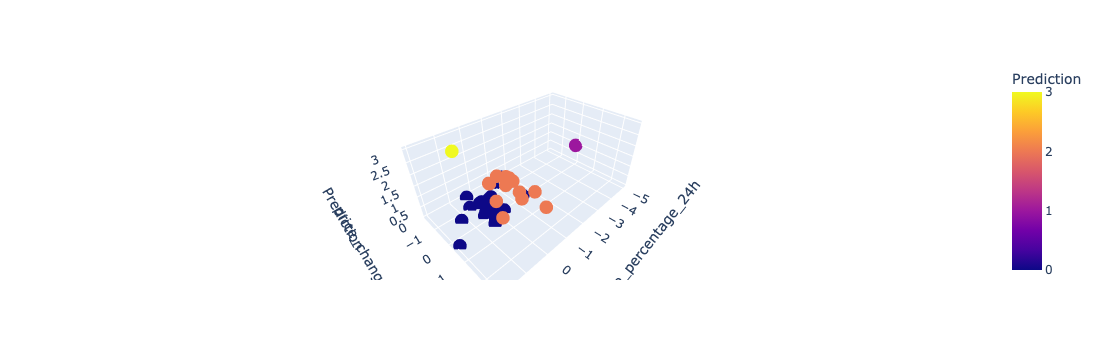

In [139]:
# 3D Plot - see what is different 

# Create a 3D scatter plot

market_scaled_plot = px.scatter_3d(
    df_market_scaled_prediction, 
    x="price_change_percentage_24h", 
    y="price_change_percentage_7d", 
    z="Prediction", 
    color="Prediction", 
    hover_data=['price_change_percentage_24h', 'price_change_percentage_7d'] 
)

# Show the plot
market_scaled_plot.show()

---

### Optimize Clusters with Principal Component Analysis.

In [103]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [104]:
# Use the PCA model with `fit_transform` to reduce the original scaled DataFrame
# down to three principal components.
market_pca = pca.fit_transform(df_market_scaled)

# View the scaled PCA data
market_pca[:5]


array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [105]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.3719856 , 0.34700813, 0.17603793])

In [106]:
# Wonder what is the Variance Ratio? 
# Do I need to worry about it? :) - Is it cheating?

total_explained_variance = np.sum(pca.explained_variance_ratio_)
total_explained_variance

0.8950316570309842

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer: 89%  ** 

In [107]:
# Create a new DataFrame with the PCA data.
market_pca_df = pd.DataFrame(
    market_pca,
    columns=["PCA1", "PCA2" , "PCA3"]
)
# Copy the crypto names from the original scaled DataFrame

market_pca_df["Crypto_names"]=df_market_data.index

# Set the coin_id column as index
market_pca_df=market_pca_df.set_index('Crypto_names')

# Display the scaled PCA DataFrame
market_pca_df.head(8)

,PCA1,PCA2,PCA3
Crypto_names,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715
binancecoin,-0.516534,1.388377,0.804071
chainlink,-0.450711,0.517699,2.846143
cardano,-0.345600,0.729439,1.478013


---

### Find the Best Value for k Using the Scaled PCA DataFrame

In [108]:
# Create a list with the number of k-values from 1 to 11
k_pca=list(range(1,11))

In [109]:
# Create an empty list to store the inertia values
inertia=[]

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list

for i in k_pca:
    k_model = KMeans(n_clusters=i, random_state=0)
    k_model.fit(market_pca_df)
    inertia.append(k_model.inertia_)
    

In [110]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k_pca': k_pca , 'inertia': inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow_pca = pd.DataFrame(elbow_data)
df_elbow_pca.head()

,k_pca,inertia
0,1,256.874086
1,2,168.811896
2,3,115.918077
3,4,49.665497
4,5,41.357314


In [111]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
elbow_pca_plot = df_elbow_pca.hvplot.line(
    x="k_pca", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)
elbow_pca_plot

:Curve   [k_pca]   (inertia)

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer: The best k-value is k=4 when using PCA data**


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:No, it is the same k value as found using the original data** 

### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

In [112]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=2, random_state=0)


In [113]:
# Fit the K-Means model using the PCA data
model.fit(market_pca_df)

KMeans(n_clusters=2, random_state=0)

In [114]:
# Predict the clusters to group the cryptocurrencies using the scaled PCA DataFrame
k_predict = model.predict(market_pca_df)

# Print the resulting array of cluster values.
k_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [115]:
# Create a copy of the scaled PCA DataFrame
market_pca_prediction_df = market_pca_df.copy()

# Add a new column to the copy of the PCA DataFrame with the predicted clusters
market_pca_prediction_df['pca_prediction']= k_predict

# Display the copy of the scaled PCA DataFrame
market_pca_prediction_df.head(8)


,PCA1,PCA2,PCA3,pca_prediction
Crypto_names,,,,
bitcoin,-0.600667,0.842760,0.461595,0
ethereum,-0.458261,0.458466,0.952877,0
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,0
binancecoin,-0.516534,1.388377,0.804071,0
chainlink,-0.450711,0.517699,2.846143,0
cardano,-0.345600,0.729439,1.478013,0


In [116]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.

market_pca_plot=market_pca_prediction_df.hvplot.scatter(
    x="PCA1",
    y="PCA2",
    by="pca_prediction",
    hover_cols=['Crypto_names']
)
market_pca_plot

:NdOverlay   [pca_prediction]
   :Scatter   [PCA1]   (PCA2,Crypto_names)

In [141]:
print(market_pca_prediction_df.columns)

Index(['PCA1', 'PCA2', 'PCA3', 'pca_prediction'], dtype='object')


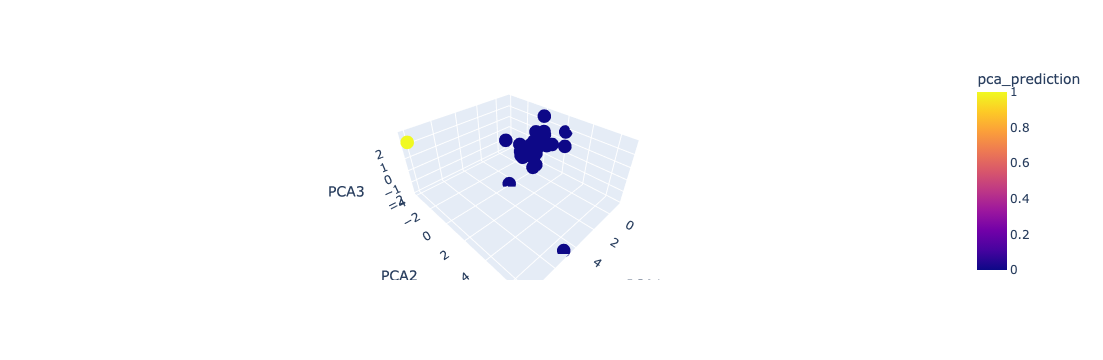

In [142]:
# I decided to test the theory by creating a 3D scatter plot and adding PCA3

market_pca_plot = px.scatter_3d(
    market_pca_prediction_df, 
    x="PCA1", 
    y="PCA2", 
    z="PCA3", 
    color="pca_prediction",  # Color points by 'pca_prediction'
    hover_data=['PCA1', 'PCA2', 'PCA3']  # Use existing columns for hover data
)

# Show the plot
market_pca_plot.show()

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [117]:
# Composite plot to contrast the Elbow curves
# YOUR CODE HERE!
(elbow_plot + elbow_pca_plot).cols(1)

:Layout
   .Curve.I  :Curve   [k_original]   (inertia)
   .Curve.II :Curve   [k_pca]   (inertia)

In [118]:
# Composite plot to contrast the clusters
# YOUR CODE HERE!
(market_scaled_plot + market_pca_plot).cols(1)


:Layout
   .NdOverlay.I  :NdOverlay   [Prediction]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,Crypto_names)
   .NdOverlay.II :NdOverlay   [pca_prediction]
      :Scatter   [PCA1]   (PCA2,Crypto_names)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:   After visually reviewing the cluster analysis, reducing the number of features for K-Means clustering had a significant effect. Initially, using the full set of features, the elbow curve suggested that 4 clusters were optimal. However, two of those clusters had only one data point each, and the separation between the remaining clusters was unclear. By applying Probabilistic PCA (PPCA) and reducing the features, we found that using K=2 produced clearer and more precise clusters in the resulting plot.** 